<img src="static/img/reminder.jpg">

# Capstone Project Demonstration


In this capstone we explored the usage of Reinforcement Learningfor portfolio construction and enhancement of quantitative investmentstrategies (QIS). Particularly we explored the usage of Policy GradientMethods (PGM) due to their ability to handle continuous action spaces.We used PGM to create a model free agent that selects portfolio weights according to a diverse set of features that we considered as space. The PGM explored are: REINFORCE, REINFORCEwith baseline, Actor-Critic, Actor-Critic with eligibility traces and soft-actor Critic.

Exploring model-free reinforcement leanring algorithms in portfolio allocation that can be generalized to any type of features provides ground work to integrate signal discovery into portfolio allocation. 


## Stones on the way ( Problems we faced)

We will focus particularly on the problem that we faced related to the proposed models.

1. Slow convergence : REINFORCE and REINFORCE with baselines experienced extremely slow convergence in the test set. This make us consider the impracticity of the algorithms for real world solutions where the number of features are complexity of the data require a higher dimensional space. 

2. Complex model pipelines: RL implementation requires more complex model pipelines than other machine learning models due to the necesity of creating different assets likes:environment, actors and policies. The interaction of assets in the algorithm creates a complex relation that is not simple to paralelize or transport to other devices. For example; in Soft Actor Critic, the agent  has a 4 architectures one model for the policy mean one for the policy variance and 2 for a twin Q function. Each of this model is a Neural Network that needs to be trained in synchrony at each step. 

3. Sampling efficiency. As with any reinforcement leanring algorithm, a great amount of time is spent in sampling sars from the environment.

4. Parametrizing the standard deviation on the normal policy did not seem to bring any improvement as we couldnt achieve learning on this parameter. 


## Model Test and proper model function

For the control dataset, we simulated different assets using a classical geometric Brownian motion process for each of the assets i.e.

$$
dS_t=\mu S_tdt+\sqrt{\sigma}S_tdB_t
$$

The control data set is built to measure the porformance of each model/algorithm against known solutions given a constant drift and a constant volatility. 

We measured each algorithm on a 2-asset simulated data using two different reward windows.

1. Next period return: On each observation the agent gets as reward the return of the portfolio for the next period. 
2. Negative of squared return : On each observation the agent gets as reward the negative of the squared return of the portfolio in the next period. 

With only two assets we expect that our algorithm will converge to the asset with highest return for the next period return reward and to the asset with the smaller volatility in the second reward. 

## Reward Functions



$$
r_t=\text{Reward at time "t"}
$$
$$
\Pi_{t}|a_{t-1}=\text{Portfolio at time "t", given action was taken at time t-1}
$$

For now on we will use $\Pi_{t}=\Pi_{t}|a_{t-1}$


### Max Return

$$
r_t=\frac{\Pi_{t+1}}{\Pi_{t}}-1
$$

### Min Quadratic Return
$$
r_t=-(\frac{\Pi_{t+1}}{\Pi_{t}}-1)^2
$$

### Return with Quadratic Risk
$$
r_t=[\frac{\Pi_{t+1}}{\Pi_{t}}-1]-\lambda a_t^t\Sigma a_t
$$

Where sigma is the asset returns covariance matrix

### Test Runs

To run test on simulated assets, user just neeed to define a dictionary with the assets characteristics. 
and use the class method 'build_environment_from_simulated_assets' from the Environment class. Below we show the run for REINFORCE and ACTOR_CRITIC. 



<img src="static/img/conver_1.png">

<img src="static/img/conv2.png">

In [1]:

# from environments.e_greedy import DeepTradingEnvironment, LinearAgent,DeepAgentPytorch
# import datetime
# import numpy as np


# out_reward_window=datetime.timedelta(days=1)
# # parameters related to the transformation of data, this parameters govern an step before the algorithm
# meta_parameters = {"in_bars_count": 30,
#                    "out_reward_window":out_reward_window ,
#                    "state_type":"in_window_out_window",
#                    "asset_names":["asset_1","asset_2"],
#                    "risk_aversion":1,
#                    "include_previous_weights":False}

# # parameters that are related to the objective/reward function construction
# objective_parameters = {"percent_commission": .001,
#                         }
# print("===Meta Parameters===")
# print(meta_parameters)
# print("===Objective Parameters===")
# print(objective_parameters)

# assets_simulation_details={"asset_1":{"method":"GBM","sigma":.01,"mean":.02},
#                     "asset_2":{"method":"GBM","sigma":.03,"mean":.18}}

# env=DeepTradingEnvironment.build_environment_from_simulated_assets(assets_simulation_details=assets_simulation_details,
#                                                                      data_hash="simulation_gbm",
#                                                                      meta_parameters=meta_parameters,
#                                                                      objective_parameters=objective_parameters)


In [2]:
# linear_agent=LinearAgent(environment=env,out_reward_window_td=out_reward_window,
#                          reward_function="return_with_variance_risk",sample_observations=32)
# linear_agent.REINFORCE_fit(add_baseline=False,max_iterations=4000,plot_every=3999)

In [3]:
# linear_agent=LinearAgent(environment=env,out_reward_window_td=out_reward_window,
#                          reward_function="cum_return",sample_observations=32)
# linear_agent.REINFORCE_fit(add_baseline=True,max_iterations=4000,plot_every=3999)

In [4]:
# linear_agent=LinearAgent(environment=env,out_reward_window_td=out_reward_window,
#                          reward_function="cum_return",sample_observations=32)
# linear_agent.ACTOR_CRITIC_FIT(use_traces=True,max_iterations=2001)

In [5]:

from environments.e_greedy import DeepTradingEnvironment, LinearAgent,DeepAgentPytorch
import datetime
import numpy as np


out_reward_window=datetime.timedelta(days=1)
# parameters related to the transformation of data, this parameters govern an step before the algorithm
meta_parameters = {"in_bars_count": 30,
                   "out_reward_window":out_reward_window ,
                   "state_type":"in_window_out_window",
                   "asset_names":["asset_1","asset_2"],
                   "risk_aversion":1e4,
                   "include_previous_weights":False}

# parameters that are related to the objective/reward function construction
objective_parameters = {"percent_commission": .001,
                        }
print("===Meta Parameters===")
print(meta_parameters)
print("===Objective Parameters===")
print(objective_parameters)

assets_simulation_details={"asset_1":{"method":"GBM","sigma":.01,"mean":.02},
                    "asset_2":{"method":"GBM","sigma":.03,"mean":.18}}

env_min_vol=DeepTradingEnvironment.build_environment_from_simulated_assets(assets_simulation_details=assets_simulation_details,
                                                                     data_hash="simulation_gbm",
                                                                     meta_parameters=meta_parameters,
                                                                     objective_parameters=objective_parameters)
def create_environment():
    env=DeepTradingEnvironment.build_environment_from_simulated_assets(assets_simulation_details=assets_simulation_details,
                                                                     data_hash="simulation_gbm",
                                                                     meta_parameters=meta_parameters,
                                                                     objective_parameters=objective_parameters)
    return env


===Meta Parameters===
{'in_bars_count': 30, 'out_reward_window': datetime.timedelta(days=1), 'state_type': 'in_window_out_window', 'asset_names': ['asset_1', 'asset_2'], 'risk_aversion': 10000.0, 'include_previous_weights': False}
===Objective Parameters===
{'percent_commission': 0.001}


/home/jose/venv/p37_deep_trading/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [6]:
cov=np.array([[assets_simulation_details["asset_1"]["sigma"]**2,0],
             [0,assets_simulation_details["asset_2"]["sigma"]**2]])/252

 12%|█▏        | 499/4000 [00:44<05:04, 11.51it/s]

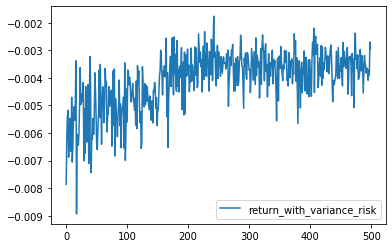

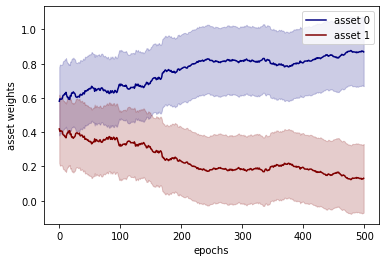

 25%|██▍       | 999/4000 [01:28<04:29, 11.12it/s]

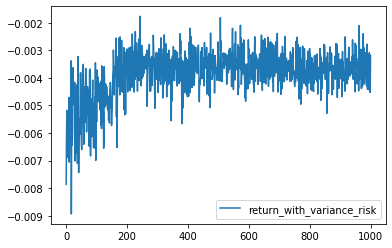

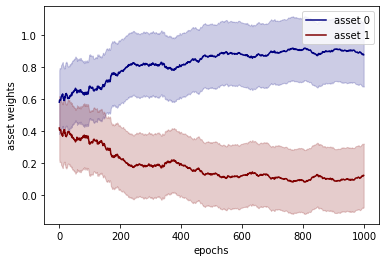

 37%|███▋      | 1499/4000 [02:13<03:49, 10.91it/s]

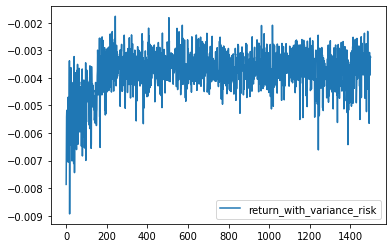

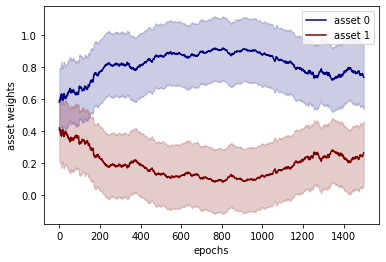

 50%|████▉     | 1999/4000 [02:57<02:59, 11.12it/s]

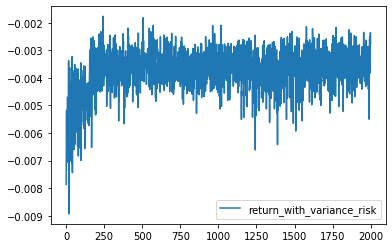

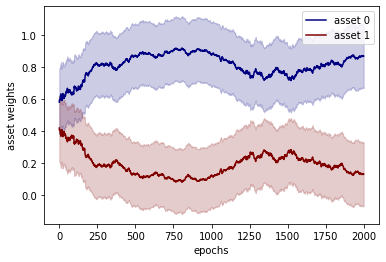

 62%|██████▏   | 2499/4000 [03:42<02:12, 11.34it/s]

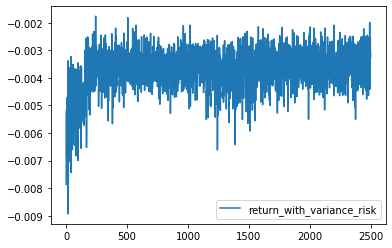

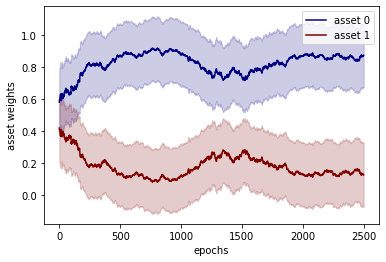

 75%|███████▍  | 2999/4000 [04:27<01:27, 11.47it/s]

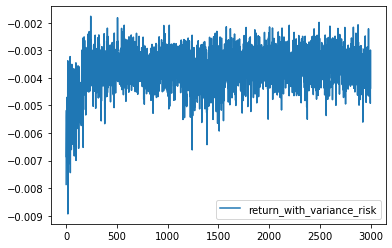

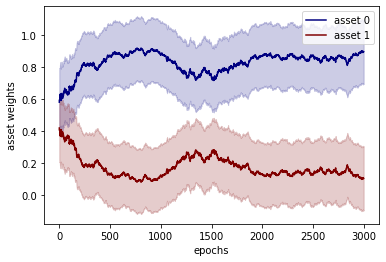

 88%|████████▊ | 3500/4000 [05:11<00:45, 11.05it/s]

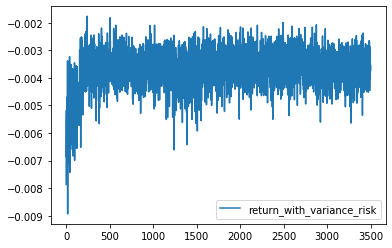

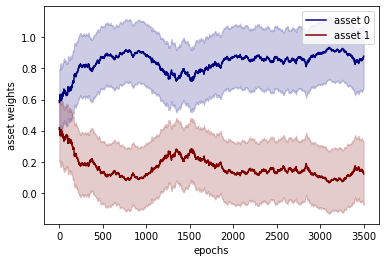

100%|██████████| 4000/4000 [05:56<00:00, 11.41it/s]

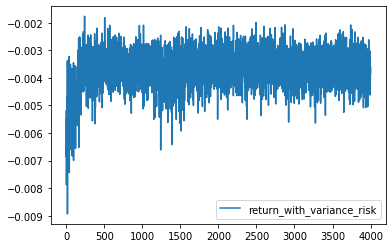

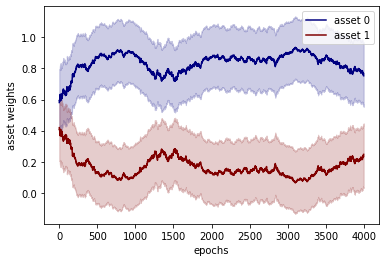

[]

In [7]:

env=create_environment()
env.state.reward_factory.ext_covariance=cov
linear_agent_min_vol=LinearAgent(environment=env,out_reward_window_td=out_reward_window,
                         reward_function="return_with_variance_risk",sample_observations=32)
linear_agent_min_vol.REINFORCE_fit(add_baseline=False,max_iterations=4000,plot_every=500)

In [8]:
env=create_environment()
env.state.reward_factory.ext_covariance=cov
linear_agent_min_vol=LinearAgent(environment=env,out_reward_window_td=out_reward_window,
                         reward_function="min_vol",sample_observations=32)
linear_agent_min_vol.REINFORCE_fit(add_baseline=True,max_iterations=4000,plot_every=3999)


pre-sampling indices:  69%|██████▉   | 948/1373 [00:11<00:05, 77.76it/s]


pre-sampling indices: 100%|██████████| 1373/1373 [00:17<00:00, 79.77it/s]

  2%|▏         | 85/4000 [00:11<08:40,  7.53it/s]


  6%|▌         | 236/4000 [00:31<08:12,  7.64it/s]


 10%|▉         | 387/4000 [00:52<08:04,  7.46it/s]


 12%|█▎        | 500/4000 [01:07<07:44,  7.53it/s]

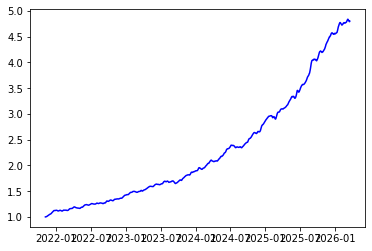

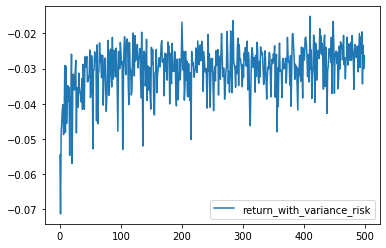

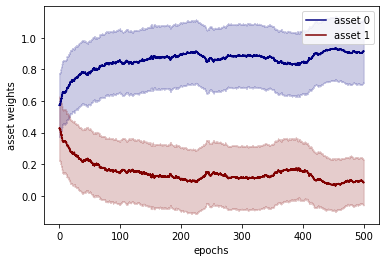

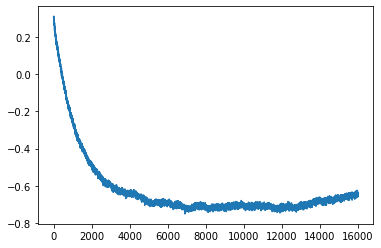


 16%|█▋        | 651/4000 [01:29<07:21,  7.59it/s]


 20%|██        | 802/4000 [01:49<07:18,  7.29it/s]


 24%|██▍       | 953/4000 [02:10<06:48,  7.47it/s]


 25%|██▌       | 1000/4000 [02:16<06:57,  7.19it/s]

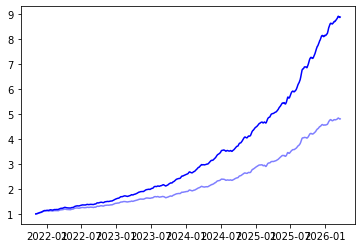

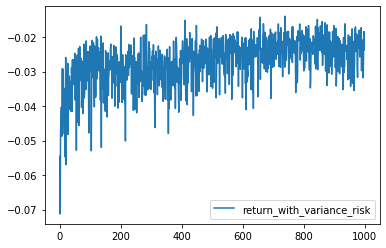

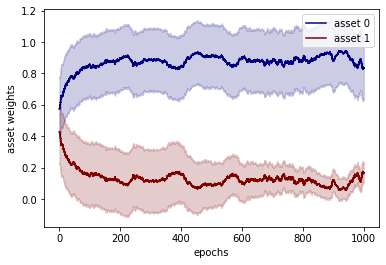

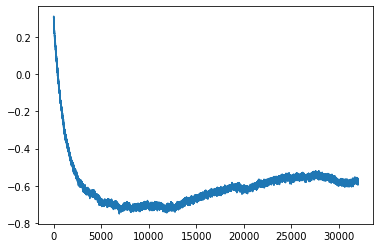


 29%|██▊       | 1148/4000 [02:37<06:18,  7.53it/s]


 32%|███▏      | 1296/4000 [02:57<06:17,  7.16it/s]


 36%|███▌      | 1444/4000 [03:17<05:41,  7.48it/s]


 38%|███▊      | 1500/4000 [03:25<05:40,  7.35it/s]

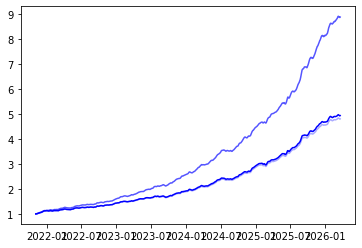

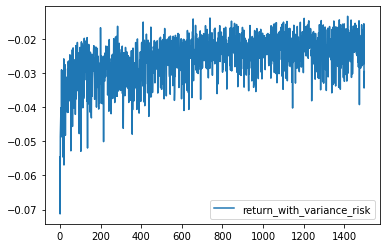

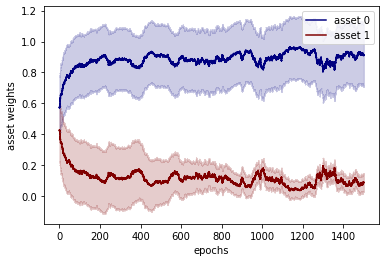

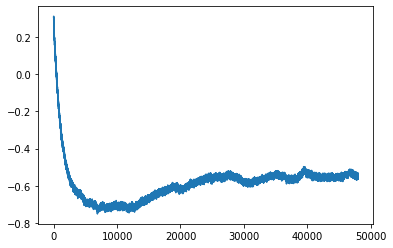


 41%|████      | 1648/4000 [03:46<05:12,  7.52it/s]


 45%|████▍     | 1796/4000 [04:06<05:08,  7.14it/s]


 49%|████▊     | 1944/4000 [04:26<04:31,  7.56it/s]


 50%|█████     | 2000/4000 [04:33<04:33,  7.30it/s]

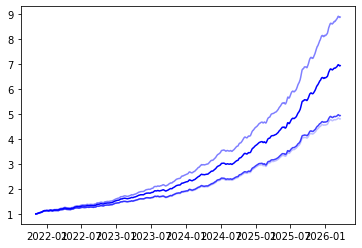

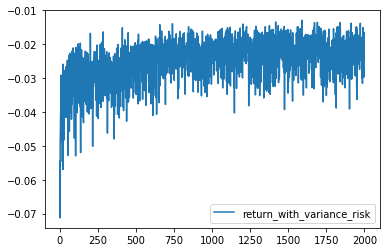

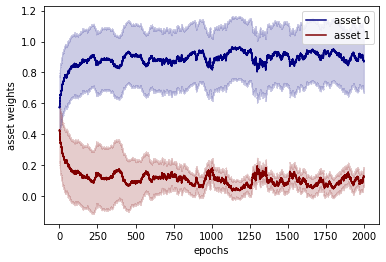

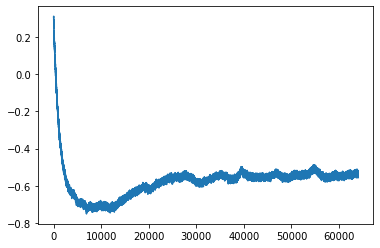


 54%|█████▎    | 2148/4000 [04:54<04:12,  7.33it/s]


 57%|█████▋    | 2296/4000 [05:15<03:41,  7.68it/s]


 61%|██████    | 2444/4000 [05:35<03:30,  7.41it/s]


 62%|██████▎   | 2500/4000 [05:42<03:16,  7.61it/s]

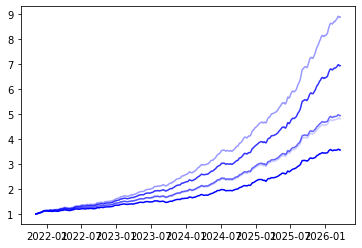

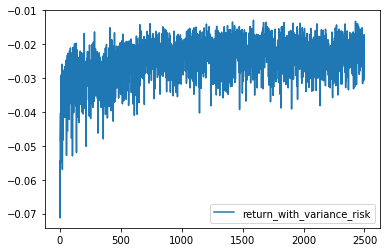

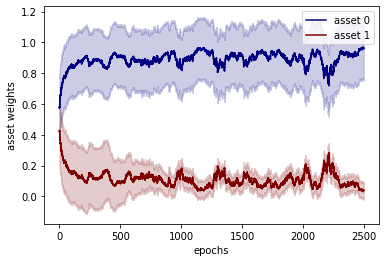

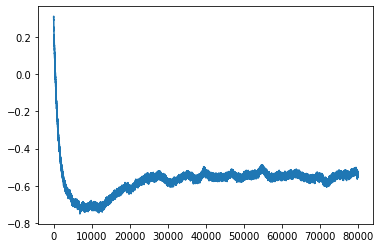


 66%|██████▌   | 2648/4000 [06:04<03:12,  7.02it/s]


 70%|██████▉   | 2796/4000 [06:24<02:48,  7.13it/s]


 74%|███████▎  | 2944/4000 [06:44<02:22,  7.42it/s]


 75%|███████▌  | 3000/4000 [06:51<02:11,  7.59it/s]

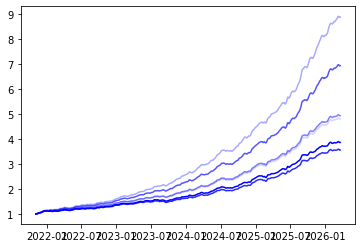

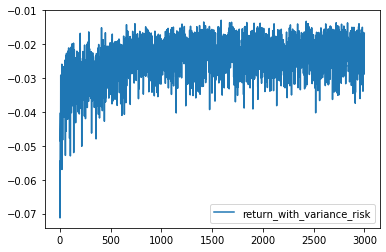

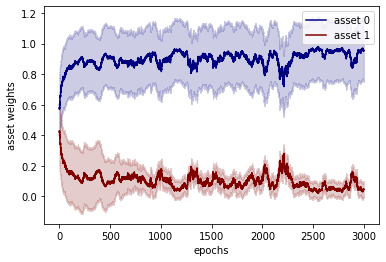

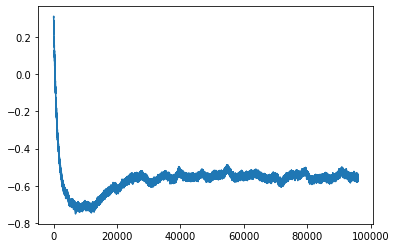


 79%|███████▊  | 3148/4000 [07:13<01:56,  7.33it/s]


 82%|████████▏ | 3296/4000 [07:33<01:31,  7.66it/s]


 86%|████████▌ | 3444/4000 [07:53<01:11,  7.74it/s]


 88%|████████▊ | 3500/4000 [08:00<01:07,  7.36it/s]

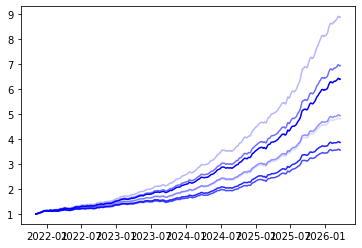

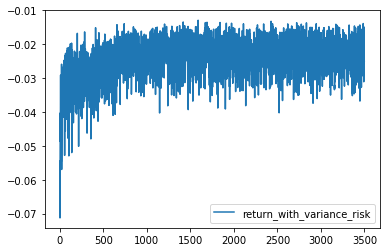

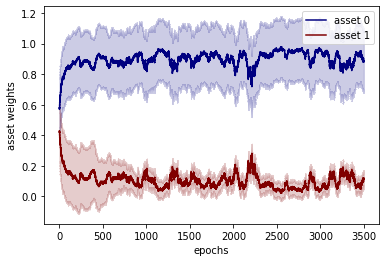

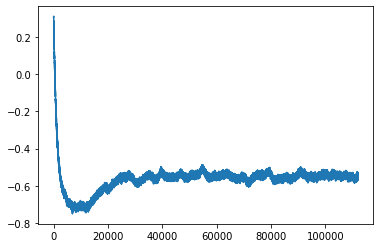


 91%|█████████ | 3648/4000 [08:22<00:46,  7.60it/s]


 95%|█████████▍| 3796/4000 [08:42<00:26,  7.74it/s]


 99%|█████████▊| 3944/4000 [09:03<00:07,  7.24it/s]


100%|██████████| 4000/4000 [09:10<00:00,  7.31it/s]

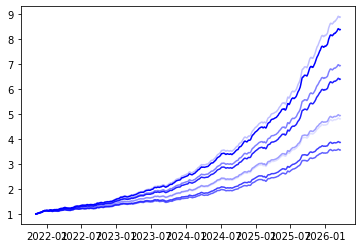

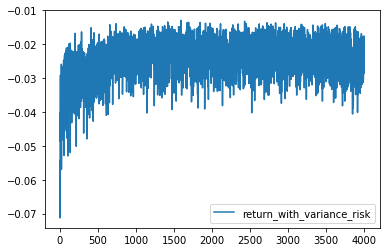

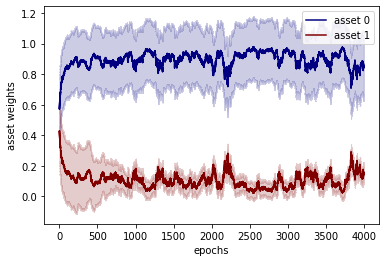

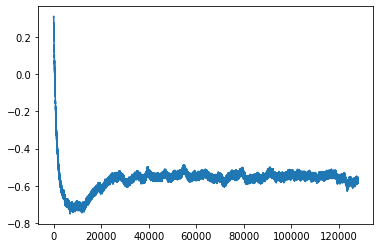

[]

In [9]:
env=create_environment()
env.state.reward_factory.ext_covariance=cov

linear_agent_min_vol=LinearAgent(environment=env_min_vol,out_reward_window_td=out_reward_window,
                         reward_function="return_with_variance_risk",sample_observations=32)
linear_agent_min_vol.ACTOR_CRITIC_FIT(use_traces=True,max_iterations=4000,plot_every=2000)

### Soft Actor Critic. 

We separated the execution of Soft actor critic as it uses a third party library. 

In [10]:
from environments.open_ai import DeepTradingEnvironment
from algorithms.sac.sac import sac as sac_capstone
import pandas as pd
from algorithms.sac.core import MLPActorCritic as MLPActorCriticCapstone

/home/jose/venv/p37_deep_trading/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Logging data to /tmp/experiments/1608032034/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "hidden_sizes":	[
            1
        ]
    },
    "actor_critic":	"MLPActorCritic",
    "alpha":	0.0,
    "batch_size":	100,
    "env_fn":	"<function <lambda> at 0x7f75b3935050>",
    "epochs":	400,
    "gamma":	0.99,
    "logger":	{
        "<spinup.utils.logx.EpochLogger object at 0x7f75b392d190>":	{
            "epoch_dict":	{},
            "exp_name":	null,
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"/tmp/experiments/1608032034",
            "output_file":	{
                "<_io.TextIOWrapper name='/tmp/experiments/1608032034/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{},
    "lr":	0.001,
    "max_ep_len":	1000,
    "num_test_episodes":	1,
    "polyak":	0.995,
    "replay_size":	1000000,
    "save

/home/jose/venv/p37_deep_trading/lib/python3.7/site-packages/torch/autograd/__init__.py:132: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  allow_unreachable=True)  # allow_unreachable flag


---------------------------------------
|           asset_0 |           0.468 |
|           asset_1 |           0.532 |
|             Epoch |               3 |
|      AverageEpRet |       -0.000871 |
|          StdEpRet |        0.000452 |
|          MaxEpRet |       -0.000245 |
|          MinEpRet |        -0.00171 |
|  AverageTestEpRet |        -0.00147 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |        -0.00147 |
|      MinTestEpRet |        -0.00147 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |             191 |
|     AverageQ1Vals |          -0.101 |
|         StdQ1Vals |         0.00945 |
|         MaxQ1Vals |         -0.0834 |
|         MinQ1Vals |          -0.117 |
|     AverageQ2Vals |          -0.568 |
|         StdQ2Vals |         0.00695 |
|         MaxQ2Vals |          -0.558 |
|         MinQ2Vals |          -0.589 |
|      AverageLogPi |          -0.174 |
|          StdLogPi |           0.943 |


---------------------------------------
|           asset_0 |           0.722 |
|           asset_1 |           0.278 |
|             Epoch |              10 |
|      AverageEpRet |       -0.000609 |
|          StdEpRet |        0.000212 |
|          MaxEpRet |       -0.000396 |
|          MinEpRet |       -0.000821 |
|  AverageTestEpRet |        -9.9e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |        -9.9e-05 |
|      MinTestEpRet |        -9.9e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |             639 |
|     AverageQ1Vals |          -0.506 |
|         StdQ1Vals |          0.0504 |
|         MaxQ1Vals |          -0.358 |
|         MinQ1Vals |          -0.654 |
|     AverageQ2Vals |          -0.516 |
|         StdQ2Vals |           0.003 |
|         MaxQ2Vals |           -0.51 |
|         MinQ2Vals |           -0.52 |
|      AverageLogPi |          -0.068 |
|          StdLogPi |           0.886 |


---------------------------------------
|           asset_0 |           0.843 |
|           asset_1 |           0.157 |
|             Epoch |              17 |
|      AverageEpRet |        -0.00035 |
|          StdEpRet |         0.00021 |
|          MaxEpRet |        -0.00014 |
|          MinEpRet |       -0.000559 |
|  AverageTestEpRet |       -0.000515 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000515 |
|      MinTestEpRet |       -0.000515 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.09e+03 |
|     AverageQ1Vals |          -0.469 |
|         StdQ1Vals |           0.026 |
|         MaxQ1Vals |          -0.385 |
|         MinQ1Vals |          -0.552 |
|     AverageQ2Vals |          -0.472 |
|         StdQ2Vals |         0.00482 |
|         MaxQ2Vals |          -0.468 |
|         MinQ2Vals |           -0.51 |
|      AverageLogPi |          0.0102 |
|          StdLogPi |           0.969 |


---------------------------------------
|           asset_0 |            0.87 |
|           asset_1 |            0.13 |
|             Epoch |              24 |
|      AverageEpRet |        -0.00079 |
|          StdEpRet |         8.8e-05 |
|          MaxEpRet |       -0.000702 |
|          MinEpRet |       -0.000878 |
|  AverageTestEpRet |       -0.000272 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000272 |
|      MinTestEpRet |       -0.000272 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.54e+03 |
|     AverageQ1Vals |          -0.442 |
|         StdQ1Vals |          0.0115 |
|         MaxQ1Vals |          -0.404 |
|         MinQ1Vals |          -0.478 |
|     AverageQ2Vals |          -0.442 |
|         StdQ2Vals |         0.00408 |
|         MaxQ2Vals |          -0.438 |
|         MinQ2Vals |          -0.477 |
|      AverageLogPi |          0.0528 |
|          StdLogPi |           0.961 |


---------------------------------------
|           asset_0 |           0.893 |
|           asset_1 |           0.107 |
|             Epoch |              31 |
|      AverageEpRet |       -0.000523 |
|          StdEpRet |        0.000305 |
|          MaxEpRet |       -0.000218 |
|          MinEpRet |       -0.000828 |
|  AverageTestEpRet |       -2.56e-06 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -2.56e-06 |
|      MinTestEpRet |       -2.56e-06 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.98e+03 |
|     AverageQ1Vals |          -0.409 |
|         StdQ1Vals |         0.00397 |
|         MaxQ1Vals |          -0.396 |
|         MinQ1Vals |          -0.421 |
|     AverageQ2Vals |          -0.408 |
|         StdQ2Vals |         0.00417 |
|         MaxQ2Vals |          -0.402 |
|         MinQ2Vals |          -0.434 |
|      AverageLogPi |           0.096 |
|          StdLogPi |           0.926 |


---------------------------------------
|           asset_0 |           0.919 |
|           asset_1 |          0.0809 |
|             Epoch |              38 |
|      AverageEpRet |       -0.000739 |
|          StdEpRet |        0.000165 |
|          MaxEpRet |       -0.000574 |
|          MinEpRet |       -0.000904 |
|  AverageTestEpRet |       -0.000176 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000176 |
|      MinTestEpRet |       -0.000176 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        2.43e+03 |
|     AverageQ1Vals |          -0.374 |
|         StdQ1Vals |         0.00256 |
|         MaxQ1Vals |          -0.367 |
|         MinQ1Vals |          -0.382 |
|     AverageQ2Vals |          -0.373 |
|         StdQ2Vals |          0.0027 |
|         MaxQ2Vals |           -0.37 |
|         MinQ2Vals |          -0.398 |
|      AverageLogPi |          0.0997 |
|          StdLogPi |           0.954 |


---------------------------------------
|           asset_0 |           0.946 |
|           asset_1 |          0.0543 |
|             Epoch |              45 |
|      AverageEpRet |       -0.000375 |
|          StdEpRet |        2.73e-05 |
|          MaxEpRet |       -0.000347 |
|          MinEpRet |       -0.000402 |
|  AverageTestEpRet |       -9.47e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -9.47e-05 |
|      MinTestEpRet |       -9.47e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        2.88e+03 |
|     AverageQ1Vals |          -0.345 |
|         StdQ1Vals |         0.00288 |
|         MaxQ1Vals |          -0.334 |
|         MinQ1Vals |          -0.354 |
|     AverageQ2Vals |          -0.344 |
|         StdQ2Vals |         0.00329 |
|         MaxQ2Vals |           -0.34 |
|         MinQ2Vals |           -0.37 |
|      AverageLogPi |           0.142 |
|          StdLogPi |           0.962 |


---------------------------------------
|           asset_0 |            0.96 |
|           asset_1 |          0.0401 |
|             Epoch |              52 |
|      AverageEpRet |       -0.000218 |
|          StdEpRet |        0.000172 |
|          MaxEpRet |       -4.63e-05 |
|          MinEpRet |       -0.000391 |
|  AverageTestEpRet |        -5.5e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |        -5.5e-05 |
|      MinTestEpRet |        -5.5e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        3.33e+03 |
|     AverageQ1Vals |          -0.316 |
|         StdQ1Vals |         0.00311 |
|         MaxQ1Vals |          -0.304 |
|         MinQ1Vals |          -0.327 |
|     AverageQ2Vals |          -0.315 |
|         StdQ2Vals |         0.00204 |
|         MaxQ2Vals |          -0.312 |
|         MinQ2Vals |          -0.336 |
|      AverageLogPi |           0.155 |
|          StdLogPi |           0.974 |


---------------------------------------
|           asset_0 |           0.969 |
|           asset_1 |          0.0309 |
|             Epoch |              59 |
|      AverageEpRet |         -0.0004 |
|          StdEpRet |         0.00012 |
|          MaxEpRet |        -0.00028 |
|          MinEpRet |        -0.00052 |
|  AverageTestEpRet |       -0.000332 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000332 |
|      MinTestEpRet |       -0.000332 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        3.78e+03 |
|     AverageQ1Vals |           -0.29 |
|         StdQ1Vals |         0.00279 |
|         MaxQ1Vals |          -0.279 |
|         MinQ1Vals |            -0.3 |
|     AverageQ2Vals |           -0.29 |
|         StdQ2Vals |         0.00249 |
|         MaxQ2Vals |          -0.286 |
|         MinQ2Vals |          -0.312 |
|      AverageLogPi |           0.179 |
|          StdLogPi |            0.94 |


---------------------------------------
|           asset_0 |           0.976 |
|           asset_1 |          0.0241 |
|             Epoch |              66 |
|      AverageEpRet |       -0.000429 |
|          StdEpRet |        0.000349 |
|          MaxEpRet |       -7.94e-05 |
|          MinEpRet |       -0.000778 |
|  AverageTestEpRet |       -0.000245 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000245 |
|      MinTestEpRet |       -0.000245 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        4.22e+03 |
|     AverageQ1Vals |          -0.267 |
|         StdQ1Vals |          0.0024 |
|         MaxQ1Vals |          -0.258 |
|         MinQ1Vals |          -0.276 |
|     AverageQ2Vals |          -0.266 |
|         StdQ2Vals |         0.00174 |
|         MaxQ2Vals |          -0.264 |
|         MinQ2Vals |          -0.288 |
|      AverageLogPi |            0.17 |
|          StdLogPi |           0.987 |


---------------------------------------
|           asset_0 |           0.981 |
|           asset_1 |          0.0194 |
|             Epoch |              73 |
|      AverageEpRet |       -0.000645 |
|          StdEpRet |        2.06e-05 |
|          MaxEpRet |       -0.000624 |
|          MinEpRet |       -0.000666 |
|  AverageTestEpRet |       -0.000339 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000339 |
|      MinTestEpRet |       -0.000339 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        4.67e+03 |
|     AverageQ1Vals |          -0.245 |
|         StdQ1Vals |         0.00225 |
|         MaxQ1Vals |          -0.236 |
|         MinQ1Vals |          -0.252 |
|     AverageQ2Vals |          -0.244 |
|         StdQ2Vals |          0.0016 |
|         MaxQ2Vals |          -0.243 |
|         MinQ2Vals |          -0.262 |
|      AverageLogPi |           0.187 |
|          StdLogPi |           0.971 |


---------------------------------------
|           asset_0 |           0.984 |
|           asset_1 |          0.0155 |
|             Epoch |              80 |
|      AverageEpRet |       -0.000385 |
|          StdEpRet |        0.000115 |
|          MaxEpRet |       -0.000271 |
|          MinEpRet |         -0.0005 |
|  AverageTestEpRet |       -0.000242 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000242 |
|      MinTestEpRet |       -0.000242 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        5.12e+03 |
|     AverageQ1Vals |          -0.225 |
|         StdQ1Vals |         0.00215 |
|         MaxQ1Vals |          -0.217 |
|         MinQ1Vals |          -0.233 |
|     AverageQ2Vals |          -0.225 |
|         StdQ2Vals |         0.00167 |
|         MaxQ2Vals |          -0.223 |
|         MinQ2Vals |          -0.241 |
|      AverageLogPi |           0.189 |
|          StdLogPi |            0.97 |


---------------------------------------
|           asset_0 |           0.987 |
|           asset_1 |          0.0126 |
|             Epoch |              87 |
|      AverageEpRet |       -0.000473 |
|          StdEpRet |        0.000387 |
|          MaxEpRet |       -8.61e-05 |
|          MinEpRet |        -0.00086 |
|  AverageTestEpRet |       -2.07e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -2.07e-05 |
|      MinTestEpRet |       -2.07e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        5.57e+03 |
|     AverageQ1Vals |          -0.206 |
|         StdQ1Vals |         0.00195 |
|         MaxQ1Vals |          -0.199 |
|         MinQ1Vals |          -0.214 |
|     AverageQ2Vals |          -0.206 |
|         StdQ2Vals |         0.00141 |
|         MaxQ2Vals |          -0.204 |
|         MinQ2Vals |           -0.22 |
|      AverageLogPi |           0.193 |
|          StdLogPi |           0.981 |


---------------------------------------
|           asset_0 |           0.989 |
|           asset_1 |          0.0106 |
|             Epoch |              94 |
|      AverageEpRet |       -0.000409 |
|          StdEpRet |        0.000195 |
|          MaxEpRet |       -0.000214 |
|          MinEpRet |       -0.000604 |
|  AverageTestEpRet |       -0.000544 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000544 |
|      MinTestEpRet |       -0.000544 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        6.02e+03 |
|     AverageQ1Vals |          -0.189 |
|         StdQ1Vals |         0.00129 |
|         MaxQ1Vals |          -0.184 |
|         MinQ1Vals |          -0.193 |
|     AverageQ2Vals |          -0.189 |
|         StdQ2Vals |          0.0012 |
|         MaxQ2Vals |          -0.187 |
|         MinQ2Vals |          -0.202 |
|      AverageLogPi |           0.209 |
|          StdLogPi |           0.974 |


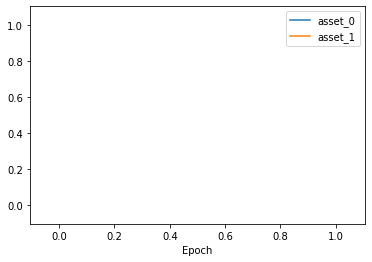

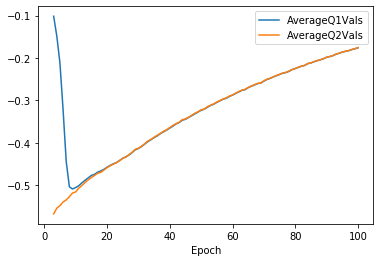

---------------------------------------
|           asset_0 |           0.991 |
|           asset_1 |         0.00909 |
|             Epoch |             101 |
|      AverageEpRet |       -0.000414 |
|          StdEpRet |        0.000377 |
|          MaxEpRet |       -3.72e-05 |
|          MinEpRet |       -0.000792 |
|  AverageTestEpRet |       -0.000196 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000196 |
|      MinTestEpRet |       -0.000196 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        6.46e+03 |
|     AverageQ1Vals |          -0.174 |
|         StdQ1Vals |         0.00161 |
|         MaxQ1Vals |          -0.168 |
|         MinQ1Vals |          -0.179 |
|     AverageQ2Vals |          -0.173 |
|         StdQ2Vals |         0.00186 |
|         MaxQ2Vals |          -0.171 |
|         MinQ2Vals |          -0.186 |
|      AverageLogPi |           0.199 |
|          StdLogPi |           0.977 |


---------------------------------------
|           asset_0 |           0.992 |
|           asset_1 |         0.00775 |
|             Epoch |             108 |
|      AverageEpRet |       -0.000307 |
|          StdEpRet |        0.000304 |
|          MaxEpRet |       -2.52e-06 |
|          MinEpRet |       -0.000611 |
|  AverageTestEpRet |       -1.96e-07 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -1.96e-07 |
|      MinTestEpRet |       -1.96e-07 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        6.91e+03 |
|     AverageQ1Vals |          -0.158 |
|         StdQ1Vals |         0.00129 |
|         MaxQ1Vals |          -0.154 |
|         MinQ1Vals |          -0.163 |
|     AverageQ2Vals |          -0.158 |
|         StdQ2Vals |         0.00142 |
|         MaxQ2Vals |          -0.157 |
|         MinQ2Vals |          -0.169 |
|      AverageLogPi |           0.207 |
|          StdLogPi |           0.966 |


---------------------------------------
|           asset_0 |           0.993 |
|           asset_1 |         0.00669 |
|             Epoch |             115 |
|      AverageEpRet |       -0.000403 |
|          StdEpRet |        6.84e-05 |
|          MaxEpRet |       -0.000335 |
|          MinEpRet |       -0.000472 |
|  AverageTestEpRet |       -0.000131 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000131 |
|      MinTestEpRet |       -0.000131 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        7.36e+03 |
|     AverageQ1Vals |          -0.145 |
|         StdQ1Vals |        0.000958 |
|         MaxQ1Vals |          -0.142 |
|         MinQ1Vals |          -0.149 |
|     AverageQ2Vals |          -0.145 |
|         StdQ2Vals |         0.00104 |
|         MaxQ2Vals |          -0.144 |
|         MinQ2Vals |          -0.156 |
|      AverageLogPi |           0.204 |
|          StdLogPi |           0.973 |


---------------------------------------
|           asset_0 |           0.994 |
|           asset_1 |         0.00586 |
|             Epoch |             122 |
|      AverageEpRet |        -0.00032 |
|          StdEpRet |        8.06e-05 |
|          MaxEpRet |        -0.00024 |
|          MinEpRet |       -0.000401 |
|  AverageTestEpRet |       -3.62e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -3.62e-05 |
|      MinTestEpRet |       -3.62e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        7.81e+03 |
|     AverageQ1Vals |          -0.133 |
|         StdQ1Vals |         0.00098 |
|         MaxQ1Vals |           -0.13 |
|         MinQ1Vals |          -0.136 |
|     AverageQ2Vals |          -0.133 |
|         StdQ2Vals |         0.00115 |
|         MaxQ2Vals |          -0.131 |
|         MinQ2Vals |          -0.143 |
|      AverageLogPi |           0.214 |
|          StdLogPi |           0.973 |


---------------------------------------
|           asset_0 |           0.995 |
|           asset_1 |         0.00516 |
|             Epoch |             129 |
|      AverageEpRet |       -0.000612 |
|          StdEpRet |        0.000244 |
|          MaxEpRet |       -0.000368 |
|          MinEpRet |       -0.000856 |
|  AverageTestEpRet |       -1.03e-06 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -1.03e-06 |
|      MinTestEpRet |       -1.03e-06 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        8.26e+03 |
|     AverageQ1Vals |          -0.121 |
|         StdQ1Vals |         0.00104 |
|         MaxQ1Vals |          -0.118 |
|         MinQ1Vals |          -0.124 |
|     AverageQ2Vals |          -0.121 |
|         StdQ2Vals |         0.00123 |
|         MaxQ2Vals |          -0.119 |
|         MinQ2Vals |           -0.13 |
|      AverageLogPi |           0.209 |
|          StdLogPi |           0.967 |


---------------------------------------
|           asset_0 |           0.995 |
|           asset_1 |         0.00455 |
|             Epoch |             136 |
|      AverageEpRet |       -0.000467 |
|          StdEpRet |        0.000275 |
|          MaxEpRet |       -0.000192 |
|          MinEpRet |       -0.000742 |
|  AverageTestEpRet |       -0.000514 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000514 |
|      MinTestEpRet |       -0.000514 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |         8.7e+03 |
|     AverageQ1Vals |          -0.111 |
|         StdQ1Vals |        0.000957 |
|         MaxQ1Vals |          -0.109 |
|         MinQ1Vals |          -0.114 |
|     AverageQ2Vals |          -0.111 |
|         StdQ2Vals |         0.00112 |
|         MaxQ2Vals |          -0.109 |
|         MinQ2Vals |           -0.12 |
|      AverageLogPi |           0.217 |
|          StdLogPi |            0.96 |


---------------------------------------
|           asset_0 |           0.996 |
|           asset_1 |         0.00407 |
|             Epoch |             143 |
|      AverageEpRet |       -5.53e-05 |
|          StdEpRet |        1.67e-05 |
|          MaxEpRet |       -3.86e-05 |
|          MinEpRet |        -7.2e-05 |
|  AverageTestEpRet |        -0.00129 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |        -0.00129 |
|      MinTestEpRet |        -0.00129 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        9.15e+03 |
|     AverageQ1Vals |          -0.102 |
|         StdQ1Vals |        0.000923 |
|         MaxQ1Vals |         -0.0994 |
|         MinQ1Vals |          -0.104 |
|     AverageQ2Vals |          -0.102 |
|         StdQ2Vals |         0.00119 |
|         MaxQ2Vals |         -0.0993 |
|         MinQ2Vals |           -0.11 |
|      AverageLogPi |           0.202 |
|          StdLogPi |           0.987 |


---------------------------------------
|           asset_0 |           0.996 |
|           asset_1 |         0.00364 |
|             Epoch |             150 |
|      AverageEpRet |       -0.000531 |
|          StdEpRet |        0.000423 |
|          MaxEpRet |       -0.000107 |
|          MinEpRet |       -0.000954 |
|  AverageTestEpRet |       -5.12e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -5.12e-05 |
|      MinTestEpRet |       -5.12e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |         9.6e+03 |
|     AverageQ1Vals |         -0.0931 |
|         StdQ1Vals |        0.000889 |
|         MaxQ1Vals |          -0.091 |
|         MinQ1Vals |         -0.0952 |
|     AverageQ2Vals |         -0.0931 |
|         StdQ2Vals |        0.000962 |
|         MaxQ2Vals |         -0.0912 |
|         MinQ2Vals |            -0.1 |
|      AverageLogPi |            0.22 |
|          StdLogPi |           0.966 |


---------------------------------------
|           asset_0 |           0.997 |
|           asset_1 |         0.00328 |
|             Epoch |             157 |
|      AverageEpRet |       -0.000728 |
|          StdEpRet |         2.4e-06 |
|          MaxEpRet |       -0.000726 |
|          MinEpRet |       -0.000731 |
|  AverageTestEpRet |       -0.000103 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000103 |
|      MinTestEpRet |       -0.000103 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |           1e+04 |
|     AverageQ1Vals |         -0.0848 |
|         StdQ1Vals |        0.000471 |
|         MaxQ1Vals |         -0.0837 |
|         MinQ1Vals |         -0.0866 |
|     AverageQ2Vals |         -0.0848 |
|         StdQ2Vals |        0.000583 |
|         MaxQ2Vals |         -0.0839 |
|         MinQ2Vals |         -0.0907 |
|      AverageLogPi |           0.194 |
|          StdLogPi |           0.976 |


---------------------------------------
|           asset_0 |           0.997 |
|           asset_1 |         0.00296 |
|             Epoch |             164 |
|      AverageEpRet |       -0.000414 |
|          StdEpRet |        0.000382 |
|          MaxEpRet |       -3.17e-05 |
|          MinEpRet |       -0.000796 |
|  AverageTestEpRet |        -0.00017 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |        -0.00017 |
|      MinTestEpRet |        -0.00017 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.05e+04 |
|     AverageQ1Vals |         -0.0777 |
|         StdQ1Vals |        0.000802 |
|         MaxQ1Vals |         -0.0763 |
|         MinQ1Vals |         -0.0801 |
|     AverageQ2Vals |         -0.0776 |
|         StdQ2Vals |        0.000819 |
|         MaxQ2Vals |         -0.0764 |
|         MinQ2Vals |          -0.083 |
|      AverageLogPi |           0.222 |
|          StdLogPi |           0.965 |


---------------------------------------
|           asset_0 |           0.997 |
|           asset_1 |          0.0027 |
|             Epoch |             171 |
|      AverageEpRet |       -0.000263 |
|          StdEpRet |         8.2e-05 |
|          MaxEpRet |       -0.000181 |
|          MinEpRet |       -0.000345 |
|  AverageTestEpRet |       -0.000465 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000465 |
|      MinTestEpRet |       -0.000465 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.09e+04 |
|     AverageQ1Vals |          -0.071 |
|         StdQ1Vals |        0.000809 |
|         MaxQ1Vals |         -0.0693 |
|         MinQ1Vals |         -0.0734 |
|     AverageQ2Vals |          -0.071 |
|         StdQ2Vals |        0.000827 |
|         MaxQ2Vals |         -0.0695 |
|         MinQ2Vals |         -0.0756 |
|      AverageLogPi |           0.186 |
|          StdLogPi |           0.995 |


---------------------------------------
|           asset_0 |           0.998 |
|           asset_1 |         0.00242 |
|             Epoch |             178 |
|      AverageEpRet |       -0.000466 |
|          StdEpRet |        0.000442 |
|          MaxEpRet |       -2.47e-05 |
|          MinEpRet |       -0.000908 |
|  AverageTestEpRet |       -2.21e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -2.21e-05 |
|      MinTestEpRet |       -2.21e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.14e+04 |
|     AverageQ1Vals |         -0.0646 |
|         StdQ1Vals |        0.000709 |
|         MaxQ1Vals |         -0.0632 |
|         MinQ1Vals |         -0.0665 |
|     AverageQ2Vals |         -0.0646 |
|         StdQ2Vals |        0.000786 |
|         MaxQ2Vals |         -0.0633 |
|         MinQ2Vals |         -0.0699 |
|      AverageLogPi |           0.204 |
|          StdLogPi |           0.988 |


---------------------------------------
|           asset_0 |           0.998 |
|           asset_1 |         0.00225 |
|             Epoch |             185 |
|      AverageEpRet |       -0.000754 |
|          StdEpRet |        0.000723 |
|          MaxEpRet |       -3.15e-05 |
|          MinEpRet |        -0.00148 |
|  AverageTestEpRet |       -6.13e-10 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -6.13e-10 |
|      MinTestEpRet |       -6.13e-10 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.18e+04 |
|     AverageQ1Vals |         -0.0591 |
|         StdQ1Vals |        0.000433 |
|         MaxQ1Vals |         -0.0582 |
|         MinQ1Vals |           -0.06 |
|     AverageQ2Vals |         -0.0591 |
|         StdQ2Vals |        0.000504 |
|         MaxQ2Vals |         -0.0582 |
|         MinQ2Vals |         -0.0636 |
|      AverageLogPi |           0.205 |
|          StdLogPi |           0.991 |


---------------------------------------
|           asset_0 |           0.998 |
|           asset_1 |         0.00213 |
|             Epoch |             192 |
|      AverageEpRet |       -0.000133 |
|          StdEpRet |        7.84e-06 |
|          MaxEpRet |       -0.000125 |
|          MinEpRet |       -0.000141 |
|  AverageTestEpRet |       -7.37e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -7.37e-05 |
|      MinTestEpRet |       -7.37e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.23e+04 |
|     AverageQ1Vals |         -0.0539 |
|         StdQ1Vals |        0.000299 |
|         MaxQ1Vals |         -0.0532 |
|         MinQ1Vals |         -0.0547 |
|     AverageQ2Vals |         -0.0539 |
|         StdQ2Vals |        0.000405 |
|         MaxQ2Vals |         -0.0533 |
|         MinQ2Vals |         -0.0577 |
|      AverageLogPi |           0.203 |
|          StdLogPi |            0.98 |


---------------------------------------
|           asset_0 |           0.998 |
|           asset_1 |         0.00195 |
|             Epoch |             199 |
|      AverageEpRet |       -0.000305 |
|          StdEpRet |        0.000129 |
|          MaxEpRet |       -0.000177 |
|          MinEpRet |       -0.000434 |
|  AverageTestEpRet |       -0.000194 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000194 |
|      MinTestEpRet |       -0.000194 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.27e+04 |
|     AverageQ1Vals |         -0.0492 |
|         StdQ1Vals |        0.000495 |
|         MaxQ1Vals |         -0.0478 |
|         MinQ1Vals |         -0.0509 |
|     AverageQ2Vals |         -0.0492 |
|         StdQ2Vals |        0.000531 |
|         MaxQ2Vals |         -0.0478 |
|         MinQ2Vals |         -0.0535 |
|      AverageLogPi |           0.208 |
|          StdLogPi |               1 |


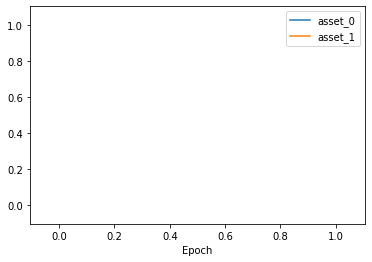

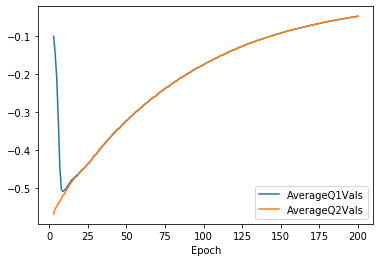

---------------------------------------
|           asset_0 |           0.998 |
|           asset_1 |         0.00189 |
|             Epoch |             201 |
|      AverageEpRet |       -0.000205 |
|          StdEpRet |        9.82e-05 |
|          MaxEpRet |       -0.000107 |
|          MinEpRet |       -0.000303 |
|  AverageTestEpRet |       -0.000213 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000213 |
|      MinTestEpRet |       -0.000213 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.29e+04 |
|     AverageQ1Vals |         -0.0479 |
|         StdQ1Vals |        0.000379 |
|         MaxQ1Vals |         -0.0472 |
|         MinQ1Vals |          -0.049 |
|     AverageQ2Vals |         -0.0479 |
|         StdQ2Vals |        0.000434 |
|         MaxQ2Vals |         -0.0472 |
|         MinQ2Vals |         -0.0513 |
|      AverageLogPi |           0.237 |
|          StdLogPi |           0.968 |


---------------------------------------
|           asset_0 |           0.998 |
|           asset_1 |         0.00176 |
|             Epoch |             208 |
|      AverageEpRet |        -0.00031 |
|          StdEpRet |        0.000209 |
|          MaxEpRet |       -0.000101 |
|          MinEpRet |       -0.000518 |
|  AverageTestEpRet |       -9.68e-06 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -9.68e-06 |
|      MinTestEpRet |       -9.68e-06 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.33e+04 |
|     AverageQ1Vals |         -0.0437 |
|         StdQ1Vals |        0.000543 |
|         MaxQ1Vals |         -0.0425 |
|         MinQ1Vals |         -0.0449 |
|     AverageQ2Vals |         -0.0437 |
|         StdQ2Vals |        0.000569 |
|         MaxQ2Vals |         -0.0425 |
|         MinQ2Vals |         -0.0467 |
|      AverageLogPi |           0.212 |
|          StdLogPi |           0.981 |


---------------------------------------
|           asset_0 |           0.998 |
|           asset_1 |         0.00159 |
|             Epoch |             215 |
|      AverageEpRet |       -0.000346 |
|          StdEpRet |        0.000241 |
|          MaxEpRet |       -0.000106 |
|          MinEpRet |       -0.000587 |
|  AverageTestEpRet |       -8.53e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -8.53e-05 |
|      MinTestEpRet |       -8.53e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.38e+04 |
|     AverageQ1Vals |         -0.0399 |
|         StdQ1Vals |        0.000773 |
|         MaxQ1Vals |         -0.0386 |
|         MinQ1Vals |         -0.0417 |
|     AverageQ2Vals |         -0.0399 |
|         StdQ2Vals |        0.000813 |
|         MaxQ2Vals |         -0.0385 |
|         MinQ2Vals |         -0.0436 |
|      AverageLogPi |           0.197 |
|          StdLogPi |           0.994 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |         0.00145 |
|             Epoch |             222 |
|      AverageEpRet |        -0.00114 |
|          StdEpRet |        0.000302 |
|          MaxEpRet |        -0.00084 |
|          MinEpRet |        -0.00144 |
|  AverageTestEpRet |       -0.000473 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000473 |
|      MinTestEpRet |       -0.000473 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.42e+04 |
|     AverageQ1Vals |         -0.0366 |
|         StdQ1Vals |        0.000391 |
|         MaxQ1Vals |         -0.0356 |
|         MinQ1Vals |         -0.0377 |
|     AverageQ2Vals |         -0.0366 |
|         StdQ2Vals |        0.000417 |
|         MaxQ2Vals |         -0.0356 |
|         MinQ2Vals |         -0.0395 |
|      AverageLogPi |           0.224 |
|          StdLogPi |           0.965 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |         0.00129 |
|             Epoch |             229 |
|      AverageEpRet |       -0.000584 |
|          StdEpRet |        0.000103 |
|          MaxEpRet |       -0.000481 |
|          MinEpRet |       -0.000687 |
|  AverageTestEpRet |       -0.000768 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000768 |
|      MinTestEpRet |       -0.000768 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.47e+04 |
|     AverageQ1Vals |         -0.0334 |
|         StdQ1Vals |        0.000636 |
|         MaxQ1Vals |          -0.032 |
|         MinQ1Vals |         -0.0349 |
|     AverageQ2Vals |         -0.0334 |
|         StdQ2Vals |        0.000648 |
|         MaxQ2Vals |          -0.032 |
|         MinQ2Vals |         -0.0364 |
|      AverageLogPi |           0.199 |
|          StdLogPi |           0.996 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |         0.00122 |
|             Epoch |             236 |
|      AverageEpRet |       -0.000718 |
|          StdEpRet |        0.000301 |
|          MaxEpRet |       -0.000417 |
|          MinEpRet |        -0.00102 |
|  AverageTestEpRet |       -3.48e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -3.48e-05 |
|      MinTestEpRet |       -3.48e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.51e+04 |
|     AverageQ1Vals |         -0.0305 |
|         StdQ1Vals |        0.000535 |
|         MaxQ1Vals |         -0.0295 |
|         MinQ1Vals |         -0.0316 |
|     AverageQ2Vals |         -0.0305 |
|         StdQ2Vals |        0.000542 |
|         MaxQ2Vals |         -0.0296 |
|         MinQ2Vals |         -0.0332 |
|      AverageLogPi |           0.226 |
|          StdLogPi |               1 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |         0.00112 |
|             Epoch |             243 |
|      AverageEpRet |       -0.000231 |
|          StdEpRet |         0.00021 |
|          MaxEpRet |       -2.14e-05 |
|          MinEpRet |       -0.000441 |
|  AverageTestEpRet |       -0.000143 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000143 |
|      MinTestEpRet |       -0.000143 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.56e+04 |
|     AverageQ1Vals |          -0.028 |
|         StdQ1Vals |        0.000348 |
|         MaxQ1Vals |         -0.0275 |
|         MinQ1Vals |         -0.0293 |
|     AverageQ2Vals |          -0.028 |
|         StdQ2Vals |        0.000372 |
|         MaxQ2Vals |         -0.0275 |
|         MinQ2Vals |         -0.0305 |
|      AverageLogPi |           0.224 |
|          StdLogPi |           0.961 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |         0.00101 |
|             Epoch |             250 |
|      AverageEpRet |       -0.000151 |
|          StdEpRet |        0.000131 |
|          MaxEpRet |       -2.09e-05 |
|          MinEpRet |       -0.000282 |
|  AverageTestEpRet |       -0.000178 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000178 |
|      MinTestEpRet |       -0.000178 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |         1.6e+04 |
|     AverageQ1Vals |         -0.0256 |
|         StdQ1Vals |        0.000482 |
|         MaxQ1Vals |         -0.0245 |
|         MinQ1Vals |         -0.0266 |
|     AverageQ2Vals |         -0.0256 |
|         StdQ2Vals |         0.00049 |
|         MaxQ2Vals |         -0.0245 |
|         MinQ2Vals |         -0.0281 |
|      AverageLogPi |            0.21 |
|          StdLogPi |           0.985 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |        0.000908 |
|             Epoch |             257 |
|      AverageEpRet |       -0.000519 |
|          StdEpRet |        0.000128 |
|          MaxEpRet |        -0.00039 |
|          MinEpRet |       -0.000647 |
|  AverageTestEpRet |       -3.79e-06 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -3.79e-06 |
|      MinTestEpRet |       -3.79e-06 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.64e+04 |
|     AverageQ1Vals |         -0.0233 |
|         StdQ1Vals |        0.000413 |
|         MaxQ1Vals |         -0.0225 |
|         MinQ1Vals |         -0.0244 |
|     AverageQ2Vals |         -0.0233 |
|         StdQ2Vals |        0.000413 |
|         MaxQ2Vals |         -0.0225 |
|         MinQ2Vals |         -0.0252 |
|      AverageLogPi |           0.217 |
|          StdLogPi |           0.986 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |         0.00081 |
|             Epoch |             264 |
|      AverageEpRet |       -0.000261 |
|          StdEpRet |        9.69e-05 |
|          MaxEpRet |       -0.000165 |
|          MinEpRet |       -0.000358 |
|  AverageTestEpRet |       -3.13e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -3.13e-05 |
|      MinTestEpRet |       -3.13e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.69e+04 |
|     AverageQ1Vals |         -0.0216 |
|         StdQ1Vals |        0.000238 |
|         MaxQ1Vals |          -0.021 |
|         MinQ1Vals |         -0.0221 |
|     AverageQ2Vals |         -0.0216 |
|         StdQ2Vals |        0.000248 |
|         MaxQ2Vals |          -0.021 |
|         MinQ2Vals |         -0.0229 |
|      AverageLogPi |           0.219 |
|          StdLogPi |           0.979 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |        0.000731 |
|             Epoch |             271 |
|      AverageEpRet |       -6.81e-05 |
|          StdEpRet |        2.14e-05 |
|          MaxEpRet |       -4.68e-05 |
|          MinEpRet |       -8.95e-05 |
|  AverageTestEpRet |       -5.73e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -5.73e-05 |
|      MinTestEpRet |       -5.73e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.73e+04 |
|     AverageQ1Vals |         -0.0196 |
|         StdQ1Vals |        0.000235 |
|         MaxQ1Vals |         -0.0189 |
|         MinQ1Vals |           -0.02 |
|     AverageQ2Vals |         -0.0196 |
|         StdQ2Vals |        0.000253 |
|         MaxQ2Vals |         -0.0189 |
|         MinQ2Vals |         -0.0211 |
|      AverageLogPi |           0.212 |
|          StdLogPi |               1 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |         0.00064 |
|             Epoch |             278 |
|      AverageEpRet |       -0.000563 |
|          StdEpRet |         0.00011 |
|          MaxEpRet |       -0.000453 |
|          MinEpRet |       -0.000673 |
|  AverageTestEpRet |       -0.000117 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000117 |
|      MinTestEpRet |       -0.000117 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.78e+04 |
|     AverageQ1Vals |          -0.018 |
|         StdQ1Vals |        0.000328 |
|         MaxQ1Vals |         -0.0173 |
|         MinQ1Vals |          -0.019 |
|     AverageQ2Vals |          -0.018 |
|         StdQ2Vals |        0.000329 |
|         MaxQ2Vals |         -0.0173 |
|         MinQ2Vals |         -0.0193 |
|      AverageLogPi |             0.2 |
|          StdLogPi |           0.997 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |         0.00057 |
|             Epoch |             285 |
|      AverageEpRet |       -0.000138 |
|          StdEpRet |        8.85e-05 |
|          MaxEpRet |       -4.98e-05 |
|          MinEpRet |       -0.000227 |
|  AverageTestEpRet |       -5.13e-06 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -5.13e-06 |
|      MinTestEpRet |       -5.13e-06 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.82e+04 |
|     AverageQ1Vals |         -0.0163 |
|         StdQ1Vals |        0.000377 |
|         MaxQ1Vals |         -0.0156 |
|         MinQ1Vals |         -0.0172 |
|     AverageQ2Vals |         -0.0163 |
|         StdQ2Vals |        0.000379 |
|         MaxQ2Vals |         -0.0156 |
|         MinQ2Vals |         -0.0179 |
|      AverageLogPi |            0.22 |
|          StdLogPi |           0.993 |


---------------------------------------
|           asset_0 |           0.999 |
|           asset_1 |         0.00051 |
|             Epoch |             292 |
|      AverageEpRet |       -0.000181 |
|          StdEpRet |        2.54e-05 |
|          MaxEpRet |       -0.000155 |
|          MinEpRet |       -0.000206 |
|  AverageTestEpRet |       -9.93e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -9.93e-05 |
|      MinTestEpRet |       -9.93e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.87e+04 |
|     AverageQ1Vals |          -0.015 |
|         StdQ1Vals |        0.000339 |
|         MaxQ1Vals |         -0.0143 |
|         MinQ1Vals |         -0.0158 |
|     AverageQ2Vals |          -0.015 |
|         StdQ2Vals |        0.000341 |
|         MaxQ2Vals |         -0.0143 |
|         MinQ2Vals |         -0.0165 |
|      AverageLogPi |           0.223 |
|          StdLogPi |           0.968 |


---------------------------------------
|           asset_0 |               1 |
|           asset_1 |         0.00045 |
|             Epoch |             299 |
|      AverageEpRet |       -0.000536 |
|          StdEpRet |        1.53e-06 |
|          MaxEpRet |       -0.000535 |
|          MinEpRet |       -0.000538 |
|  AverageTestEpRet |       -3.65e-05 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -3.65e-05 |
|      MinTestEpRet |       -3.65e-05 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.91e+04 |
|     AverageQ1Vals |         -0.0137 |
|         StdQ1Vals |         0.00034 |
|         MaxQ1Vals |         -0.0129 |
|         MinQ1Vals |         -0.0145 |
|     AverageQ2Vals |         -0.0137 |
|         StdQ2Vals |        0.000348 |
|         MaxQ2Vals |         -0.0129 |
|         MinQ2Vals |         -0.0152 |
|      AverageLogPi |           0.236 |
|          StdLogPi |           0.948 |


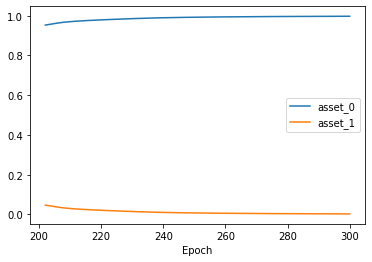

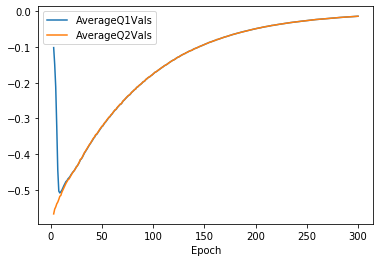

---------------------------------------
|           asset_0 |               1 |
|           asset_1 |        0.000436 |
|             Epoch |             301 |
|      AverageEpRet |       -0.000527 |
|          StdEpRet |        5.72e-05 |
|          MaxEpRet |       -0.000469 |
|          MinEpRet |       -0.000584 |
|  AverageTestEpRet |       -5.47e-08 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -5.47e-08 |
|      MinTestEpRet |       -5.47e-08 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.93e+04 |
|     AverageQ1Vals |         -0.0133 |
|         StdQ1Vals |        0.000262 |
|         MaxQ1Vals |         -0.0127 |
|         MinQ1Vals |         -0.0139 |
|     AverageQ2Vals |         -0.0133 |
|         StdQ2Vals |        0.000269 |
|         MaxQ2Vals |         -0.0127 |
|         MinQ2Vals |         -0.0143 |
|      AverageLogPi |           0.202 |
|          StdLogPi |           0.992 |


---------------------------------------
|           asset_0 |               1 |
|           asset_1 |        0.000388 |
|             Epoch |             308 |
|      AverageEpRet |       -8.94e-05 |
|          StdEpRet |        8.08e-05 |
|          MaxEpRet |       -8.62e-06 |
|          MinEpRet |        -0.00017 |
|  AverageTestEpRet |       -0.000172 |
|      StdTestEpRet |               0 |
|      MaxTestEpRet |       -0.000172 |
|      MinTestEpRet |       -0.000172 |
|             EpLen |              32 |
|         TestEpLen |              32 |
| TotalEnvInteracts |        1.97e+04 |
|     AverageQ1Vals |         -0.0122 |
|         StdQ1Vals |        0.000219 |
|         MaxQ1Vals |         -0.0116 |
|         MinQ1Vals |         -0.0128 |
|     AverageQ2Vals |         -0.0122 |
|         StdQ2Vals |        0.000218 |
|         MaxQ2Vals |         -0.0116 |
|         MinQ2Vals |         -0.0128 |
|      AverageLogPi |           0.213 |
|          StdLogPi |           0.984 |


In [ ]:
out_reward_window=datetime.timedelta(days=1)
meta_parameters = {"in_bars_count": 30,
                   "out_reward_window":out_reward_window ,
                   "state_type":"in_window_out_window",
                   "asset_names":["asset_1","asset_2"],
                   "include_previous_weights":False}

objective_parameters = {"percent_commission": .001,
                        "reward_function":"min_realized_variance"
                        }
features=pd.read_parquet("/home/jose/code/capstone/temp_persisted_data/only_features_simulation_gbm")
forward_returns_dates=pd.read_parquet("/home/jose/code/capstone/temp_persisted_data/forward_return_dates_simulation_gbm")
forward_returns= pd.read_parquet("/home/jose/code/capstone/temp_persisted_data/only_forward_returns_simulation_gbm")
new_environment= DeepTradingEnvironment(objective_parameters=objective_parameters,meta_parameters=meta_parameters,
                                        features=features,
                                        forward_returns=forward_returns,
                                        forward_returns_dates=forward_returns_dates)



env_fun =lambda : DeepTradingEnvironment(objective_parameters=objective_parameters,meta_parameters=meta_parameters,
                                        features=features,
                                        forward_returns=forward_returns,
                                        forward_returns_dates=forward_returns_dates)



#cum return
sac_capstone(env_fn=env_fun,actor_critic=MLPActorCriticCapstone,ac_kwargs={"hidden_sizes":(1,)},update_every=32,steps_per_epoch=64,epochs=400,
             start_steps=32,update_after=32*5,alpha=.001*0, lr=1e-3,save_freq=10000,num_test_episodes=1
            )

In [ ]:
out_reward_window=datetime.timedelta(days=1)
meta_parameters = {"in_bars_count": 30,
                   "out_reward_window":out_reward_window ,
                   "state_type":"in_window_out_window",
                   "asset_names":["asset_1","asset_2"],
                   "include_previous_weights":False}

objective_parameters = {"percent_commission": .001,
                        "reward_function":"cum_return"
                        }
features=pd.read_parquet("/home/jose/code/capstone/temp_persisted_data/only_features_simulation_gbm")
forward_returns_dates=pd.read_parquet("/home/jose/code/capstone/temp_persisted_data/forward_return_dates_simulation_gbm")
forward_returns= pd.read_parquet("/home/jose/code/capstone/temp_persisted_data/only_forward_returns_simulation_gbm")
new_environment= DeepTradingEnvironment(objective_parameters=objective_parameters,meta_parameters=meta_parameters,
                                        features=features,
                                        forward_returns=forward_returns,
                                        forward_returns_dates=forward_returns_dates)



env_fun =lambda : DeepTradingEnvironment(objective_parameters=objective_parameters,meta_parameters=meta_parameters,
                                        features=features,
                                        forward_returns=forward_returns,
                                        forward_returns_dates=forward_returns_dates)



#cum return
sac_capstone(env_fn=env_fun,actor_critic=MLPActorCriticCapstone,ac_kwargs={"hidden_sizes":(1,)},update_every=32,steps_per_epoch=64,epochs=400,
             start_steps=32,update_after=32*5,alpha=.001, lr=1e-3,save_freq=10000,num_test_episodes=1
            )


